In [ ]:
using Model
using Dictionaries, SplitApplyCombine
using DataFramesMeta, Dates
using CairoMakie, AlgebraOfGraphics
using StatsBase

In [ ]:
using JSON3

dir = "../../data/processed/json_augmented"

json = mapreduce(vcat, joinpath.(dir, readdir(dir))) do file
    JSON3.read(read(file), jsonlines=true)
end

coverage = map(2000:2021) do y
    js = filter(json) do j
        Dates.year(Date(j["date"])) == y
    end

    filtered_outcome = count(j -> j.outcome != "other", js)
    #filtered_date = count(j -> Date(2000) <= Date(j.date) <= Date(2021), js)
    filtered_judges = count(j -> length(j.judges) == 5, js)
    filtered_patent = count(j -> !isnothing(j.patent.cpc), js)
    filtered_total = count(js) do j
        j.outcome != "other" &&
        #Date(2000) <= Date(j.date) <= Date(2021) &&
        length(j.judges) == 5 &&
        !isnothing(j.patent.cpc) &&
        length(filter(!isnothing, j.patent.cpc)) > 0
    end

    share(x) = round(x / length(js); digits=2)

    (;  year=y, 
        total=length(js),
        filtered_outcome=filtered_outcome |> share, 
        #filtered_date, 
        filtered_judges=filtered_judges |> share, 
        filtered_patent=filtered_patent |> share, 
        filtered_total=filtered_total |> share, 
    )
end

22-element Vector{NamedTuple{(:year, :total, :filtered_outcome, :filtered_judges, :filtered_patent, :filtered_total), Tuple{Int64, Int64, Float64, Float64, Float64, Float64}}}:
 (year = 2000, total = 72, filtered_outcome = 0.93, filtered_judges = 1.0, filtered_patent = 0.94, filtered_total = 0.92)
 (year = 2001, total = 79, filtered_outcome = 0.87, filtered_judges = 1.0, filtered_patent = 0.87, filtered_total = 0.86)
 (year = 2002, total = 79, filtered_outcome = 0.92, filtered_judges = 1.0, filtered_patent = 0.86, filtered_total = 0.86)
 (year = 2003, total = 76, filtered_outcome = 0.91, filtered_judges = 1.0, filtered_patent = 0.91, filtered_total = 0.91)
 (year = 2004, total = 82, filtered_outcome = 0.88, filtered_judges = 0.99, filtered_patent = 0.85, filtered_total = 0.84)
 (year = 2005, total = 85, filtered_outcome = 0.79, filtered_judges = 1.0, filtered_patent = 0.8, filtered_total = 0.79)
 (year = 2006, total = 78, filtered_outcome = 0.81, filtered_judges = 0.0, filtered_patent 

In [ ]:
sum(c.total * c.filtered_total for c in coverage if c.year < 2021)

1227.2999999999997

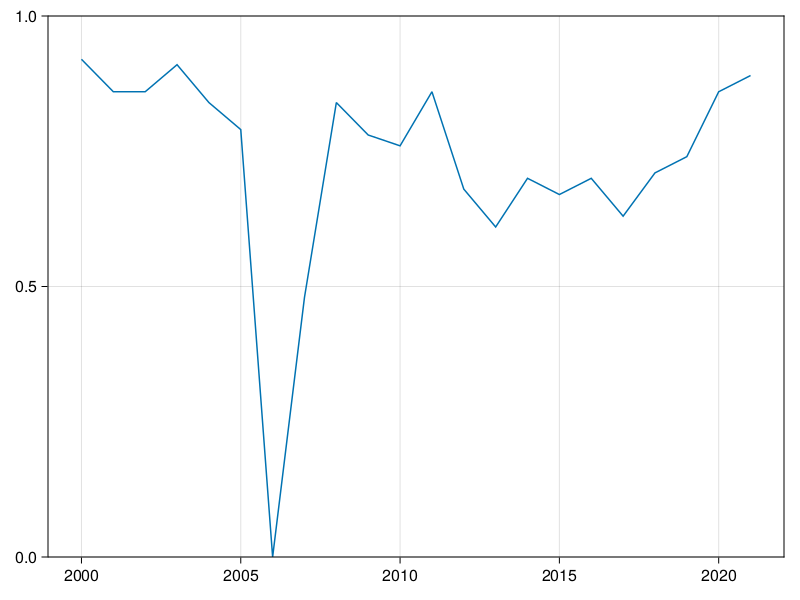

In [ ]:
let x = [c.year for c in coverage], y = [c.filtered_total for c in coverage]
    lines(x, y); ylims!(0, 1); current_figure()
end